In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import scipy
from sklearn.preprocessing import MinMaxScaler

In [44]:
df = pd.read_csv('100_hit_100_non_hit_songs.csv')

In [45]:
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,success
0,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,157067,4,1.0
1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,158040,4,1.0
2,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,201661,4,1.0
3,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,194088,4,1.0
4,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,99.960,149547,4,1.0


In [46]:
df.shape

(200, 15)

I see there are 13 audio features I'm interested in: danceability	energy	key	loudness	mode	speechiness	acousticness	instrumentalness	liveness	valence	tempo	duration_ms	time_signature.
The 'success' column is the target

In [47]:
sns.set()

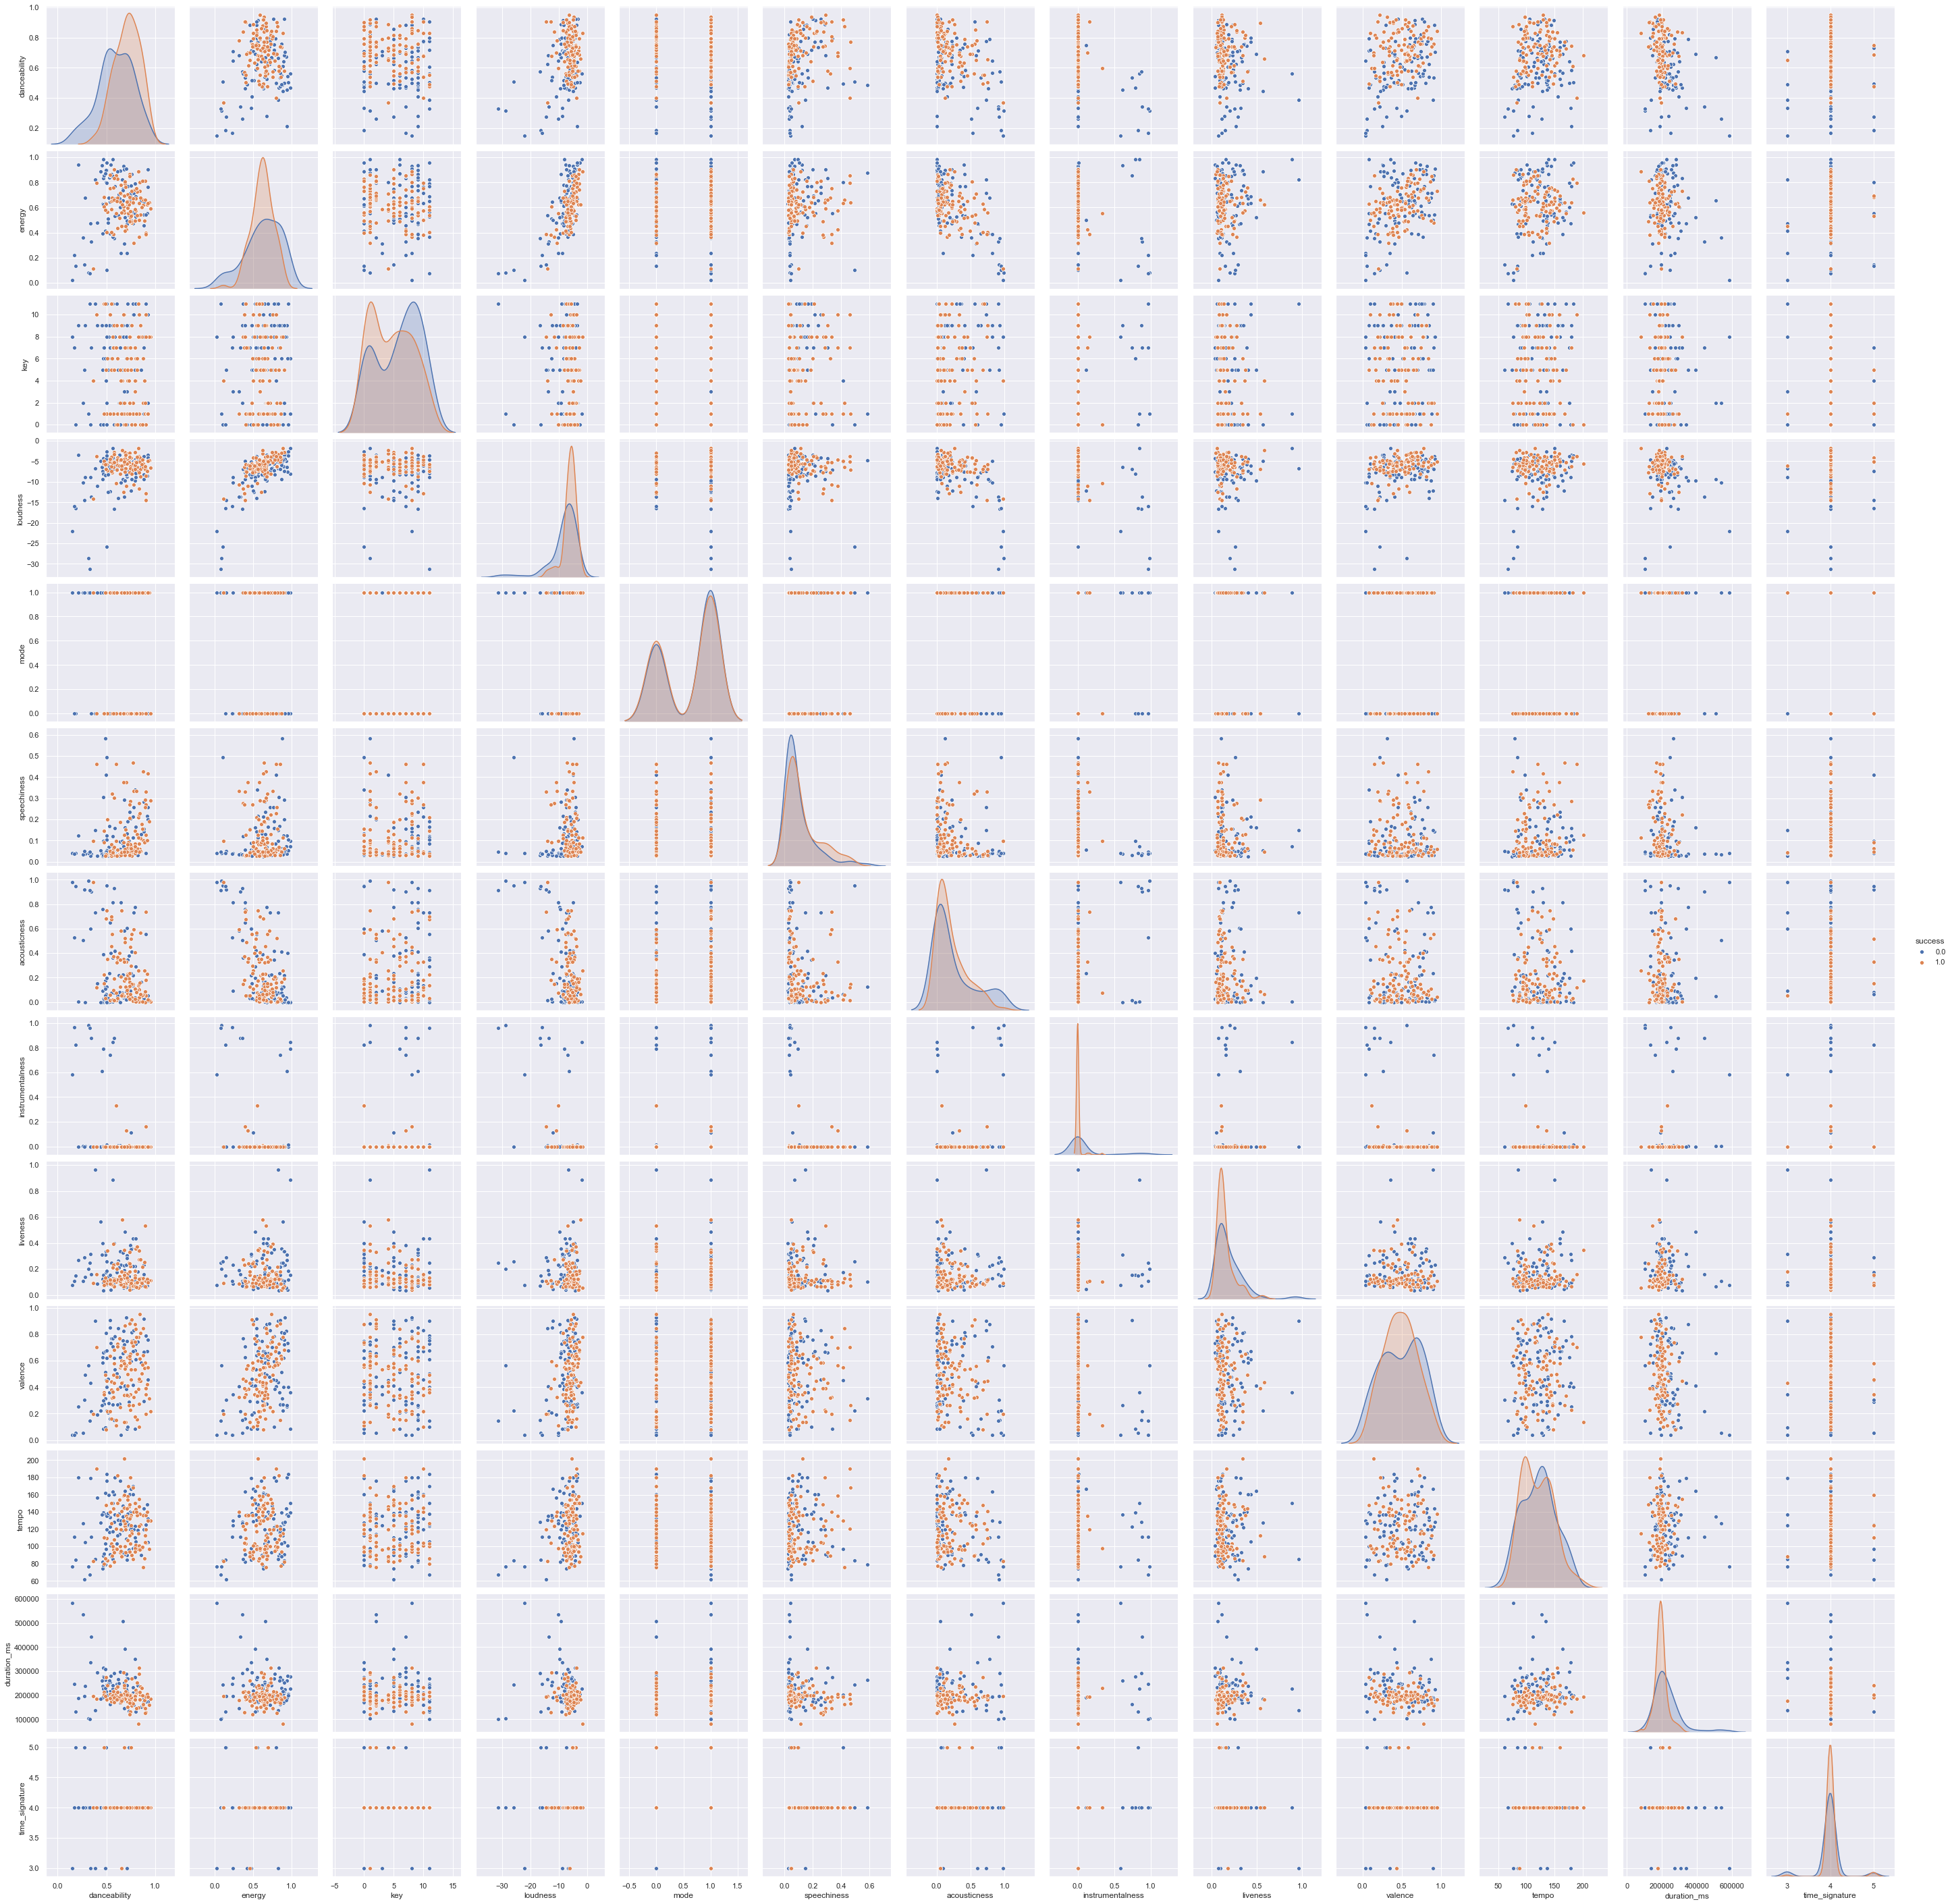

In [48]:
sns.pairplot(df, hue='success', height=3);

### 1. Rescale Data

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.

Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent. It is also useful for **algorithms that weight inputs** like **regression** and neural networks and algorithms that use distance measures like K-Nearest Neighbors.

You can rescale your data using scikit-learn using the MinMaxScaler class.

In [49]:
# Rescale data (between 0 and 1)
df.values
# separate array into input and output components
X = df.values[:,1:14]
Y = df.values[:,14]

In [50]:
X

array([[0.878, 0.619, 6, ..., 136.041, 157067, 4],
       [0.76, 0.479, 2, ..., 89.911, 158040, 4],
       [0.752, 0.488, 6, ..., 136.041, 201661, 4],
       ...,
       [0.924, 0.7659999999999999, 10, ..., 132.06, 191713, 4],
       [0.799, 0.69, 11, ..., 105.935, 200209, 4],
       [0.583, 0.769, 8, ..., 179.86900000000003, 201344, 4]],
      dtype=object)

In [66]:
Y

array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [53]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[9.100e-01 6.208e-01 5.455e-01 8.708e-01 1.000e+00 1.378e-01 5.385e-02
  0.000e+00 8.632e-02 6.575e-01 5.303e-01 1.515e-01 5.000e-01]
 [7.625e-01 4.757e-01 1.818e-01 8.703e-01 1.000e+00 3.891e-02 5.622e-01
  0.000e+00 4.042e-02 9.573e-01 2.019e-01 1.535e-01 5.000e-01]
 [7.525e-01 4.850e-01 5.455e-01 8.203e-01 1.000e+00 8.158e-02 3.003e-01
  9.286e-06 6.546e-02 5.415e-01 5.303e-01 2.403e-01 5.000e-01]
 [6.887e-01 4.197e-01 6.364e-01 6.876e-01 1.000e+00 6.251e-01 3.316e-01
  1.325e-01 7.234e-02 5.732e-01 5.238e-01 2.252e-01 5.000e-01]
 [8.488e-01 5.379e-01 1.000e+00 8.098e-01 0.000e+00 3.270e-01 1.375e-01
  1.814e-06 7.557e-02 3.828e-01 2.734e-01 1.366e-01 5.000e-01]]


### 2. Standardize Data

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and **work better with rescaled data**, such as linear regression, **logistic regression** and linear discriminate analysis.

You can standardize data using scikit-learn with the StandardScaler class.

In [54]:
# Standardize data (0 mean, 1 stdev)

from sklearn.preprocessing import StandardScaler

#array = df.values

# separate array into input and output components

#X = array[:,1:14]
#Y = array[:,14]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 1.34  -0.027  0.202  0.373  0.783 -0.118 -0.682 -0.258 -0.422  0.632
   0.505 -0.865 -0.02 ]
 [ 0.63  -0.745 -0.906  0.37   0.783 -0.604  1.197 -0.258 -0.751  1.803
  -1.109 -0.849 -0.02 ]
 [ 0.582 -0.699  0.202  0.003  0.783 -0.394  0.229 -0.258 -0.571  0.179
   0.505 -0.154 -0.02 ]
 [ 0.275 -1.022  0.48  -0.971  0.783  2.275  0.345  0.422 -0.522  0.303
   0.473 -0.274 -0.02 ]
 [ 1.045 -0.437  1.588 -0.074 -1.277  0.811 -0.373 -0.258 -0.499 -0.441
  -0.757 -0.985 -0.02 ]]


In [59]:
df2 = pd.DataFrame(np.row_stack(rescaledX))

In [56]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.340063,-0.027297,0.202333,0.373467,0.782881,-0.118161,-0.681993,-0.257680,-0.422188,0.631916,0.505404,-0.864845,-0.019615
1,0.629952,-0.744963,-0.906339,0.369986,0.782881,-0.603777,1.196706,-0.257680,-0.750773,1.802954,-1.108946,-0.849325,-0.019615
2,0.581809,-0.698827,0.202333,0.002959,0.782881,-0.394278,0.228767,-0.257633,-0.571475,0.178887,0.505404,-0.153535,-0.019615
3,0.274897,-1.021776,0.479500,-0.970556,0.782881,2.274858,0.344620,0.421640,-0.522226,0.302829,0.473453,-0.274330,-0.019615
4,1.045186,-0.437392,1.588172,-0.073878,-1.277333,0.810997,-0.372926,-0.257671,-0.499140,-0.440823,-0.757274,-0.984795,-0.019615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.926618,-2.062392,0.479500,-2.211136,-1.277333,-0.700199,1.092064,4.779740,-0.468360,-1.929409,-0.375226,0.576039,-0.019615
196,0.581809,0.772388,1.033836,-0.056471,0.782881,-0.533652,-0.760101,-0.257680,1.409265,0.443866,0.014520,-0.191785,-0.019615
197,1.616885,0.726252,1.311004,0.738504,-1.277333,1.231747,-0.690589,-0.257680,-0.536847,-0.154474,0.366087,-0.312213,-0.019615
198,0.864650,0.336662,1.588172,-0.196966,-1.277333,0.434074,-0.804574,-0.257667,2.032574,0.512248,-0.548175,-0.176695,-0.019615


In [61]:
df2.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
           'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [64]:
df2['success'] = Y

In [65]:
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,success
0,1.340063,-0.027297,0.202333,0.373467,0.782881,-0.118161,-0.681993,-0.257680,-0.422188,0.631916,0.505404,-0.864845,-0.019615,1
1,0.629952,-0.744963,-0.906339,0.369986,0.782881,-0.603777,1.196706,-0.257680,-0.750773,1.802954,-1.108946,-0.849325,-0.019615,1
2,0.581809,-0.698827,0.202333,0.002959,0.782881,-0.394278,0.228767,-0.257633,-0.571475,0.178887,0.505404,-0.153535,-0.019615,1
3,0.274897,-1.021776,0.479500,-0.970556,0.782881,2.274858,0.344620,0.421640,-0.522226,0.302829,0.473453,-0.274330,-0.019615,1
4,1.045186,-0.437392,1.588172,-0.073878,-1.277333,0.810997,-0.372926,-0.257671,-0.499140,-0.440823,-0.757274,-0.984795,-0.019615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.926618,-2.062392,0.479500,-2.211136,-1.277333,-0.700199,1.092064,4.779740,-0.468360,-1.929409,-0.375226,0.576039,-0.019615,0
196,0.581809,0.772388,1.033836,-0.056471,0.782881,-0.533652,-0.760101,-0.257680,1.409265,0.443866,0.014520,-0.191785,-0.019615,0
197,1.616885,0.726252,1.311004,0.738504,-1.277333,1.231747,-0.690589,-0.257680,-0.536847,-0.154474,0.366087,-0.312213,-0.019615,0
198,0.864650,0.336662,1.588172,-0.196966,-1.277333,0.434074,-0.804574,-0.257667,2.032574,0.512248,-0.548175,-0.176695,-0.019615,0


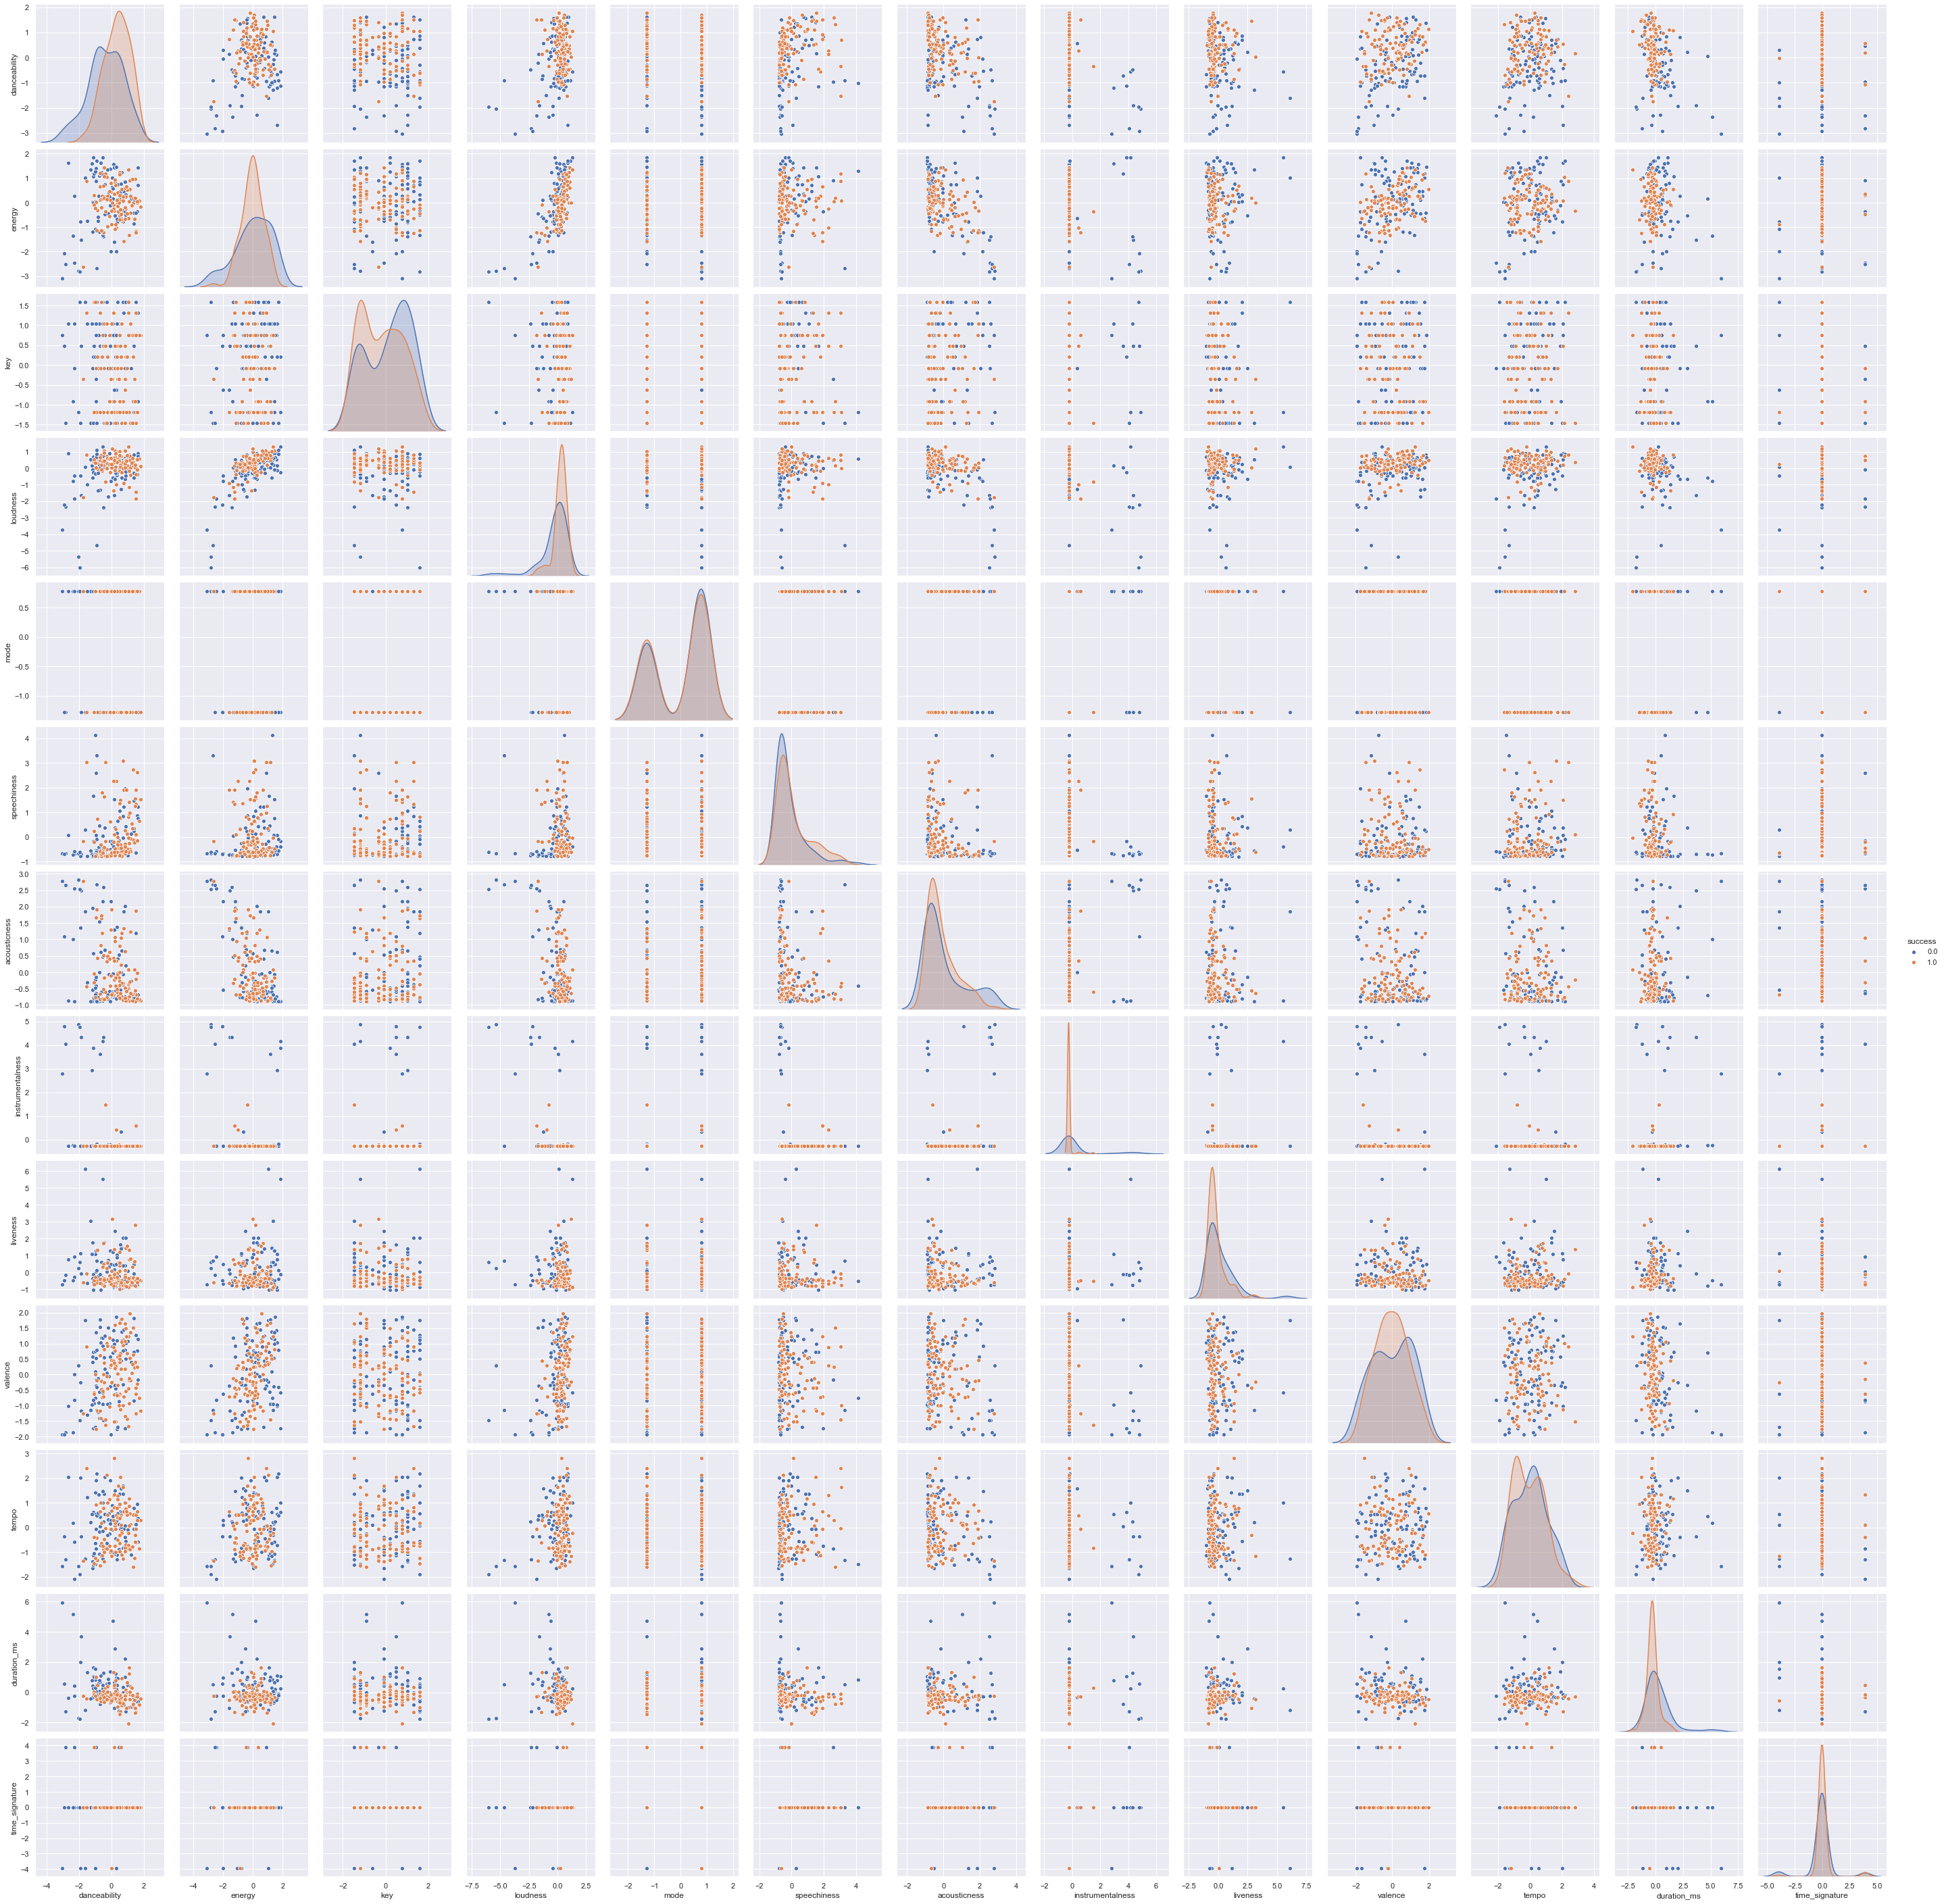

In [67]:
sns.pairplot(df2, hue='success', height=3);

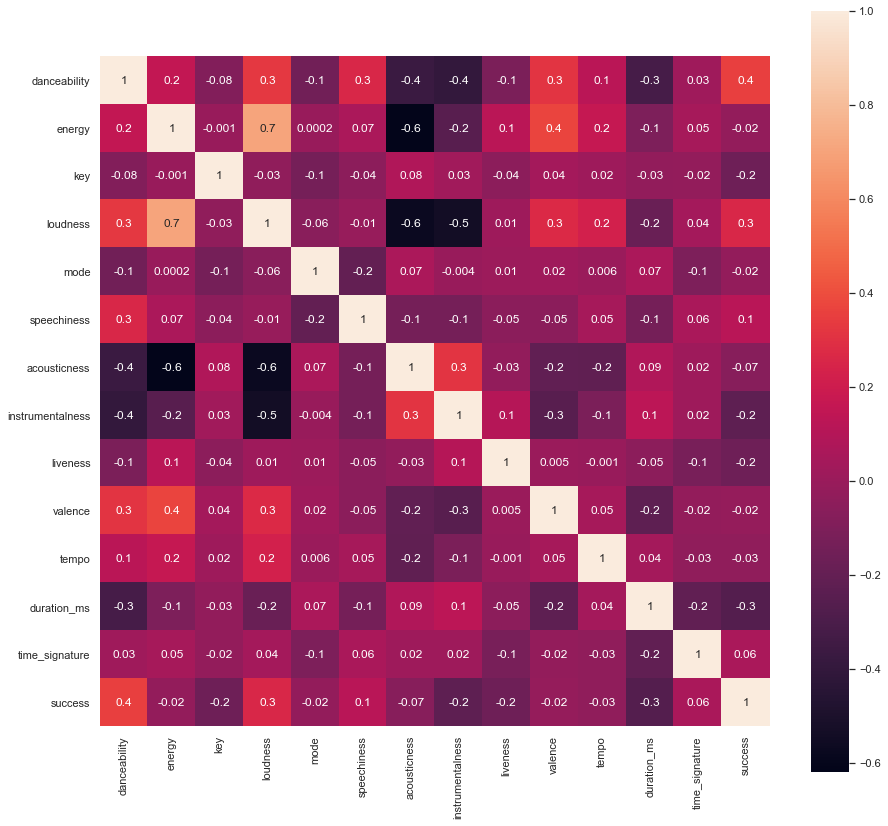

In [89]:
sns.set(rc={'figure.figsize':(15,14)})
sns.heatmap(df.corr(), annot = True, fmt='.1g', square=True);

In [90]:
df2.to_csv('100_hit_100_non_hit_songs_rescaled_x.csv', encoding='utf-8', index=False)